# Gradient Boosting Regression

Ref: [How to explain gradient boosting][1] $\gg$ [Gradient boosting regression by example][2].

[1]: https://explained.ai/gradient-boosting/index.html
[2]: https://explained.ai/gradient-boosting/L2-loss.html#sec:2.4

<a id="setup"></a>
# [1] Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Configure NumPy.
np.set_printoptions(linewidth=130)

### Dataset

In [2]:
# Values taken from Ref article.
D = np.array(
    [
        #  X     y
        [750, 1160],
        [800, 1200],
        [850, 1280],
        [900, 1450],
        [950, 2000],
    ]
)
D

array([[ 750, 1160],
       [ 800, 1200],
       [ 850, 1280],
       [ 900, 1450],
       [ 950, 2000]])

#### Feature: Apartment area in square footage.

In [3]:
X = D[:, 0]
X

array([750, 800, 850, 900, 950])

#### Target: Apartment Rent in $

In [4]:
y = D[:, 1]
y

array([1160, 1200, 1280, 1450, 2000])

Function to plot data-points and model.

In [5]:
def plot_model(x_p=[], y_p=[], label="Model"):
    plt.figure(figsize=(5, 4))

    # Plot Data-points.
    plt.scatter(X, y, label="Data-points")

    if len(x_p) and len(y_p):
        # Plot Model.
        plt.plot(x_p, y_p, label=label, color="#ff7f0e")

    plt.title("Apartment size vs Rent")
    plt.xlabel("Size in SqFeet")
    plt.ylabel("Rent in $")
    plt.legend()

    plt.show()

#### Plot Feature vs Target

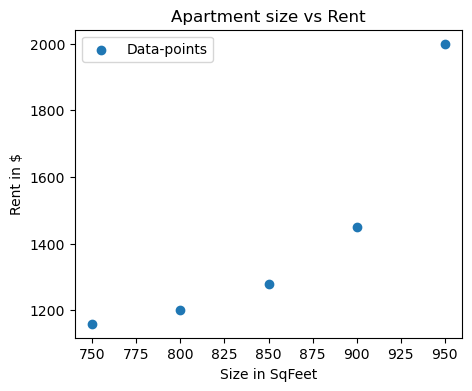

In [6]:
plot_model()

<a id="base-weak-model"></a>
# [2] Base weak model: Simple Linear Regression Model

Create a high bias regression model.

> **Note:**  
> Actual article uses **Decision Tree**, which is the most common base weak model used in boosting, but for simplicity lets use **Linear Regression Model**.

In [7]:
# y-intercept is considered as zero.
c = 0

# Compute slope
m = np.median(y / X)

print("slope:", round(m, 4))
print("y-intercept:", c)

"""
High bias regression model `h` to predict 
target-variable given input-features `X`.
"""
h = lambda X: m * X + c

slope: 1.5467
y-intercept: 0


**Why y-intercept, `c`, is set to 0?**  

_y-intercept_ is set to 0 to create a simple dumb model that passes through origin.

**How slope, `m`, is calculated?**

1. Now since _y-intercept_ is zero, equation of line becomes `y = mx`.
2. So `m = y/x`, taking mean of `np.mean(y/x)` gives us _slope_, `m = 1.654`.

#### Plot high bias model

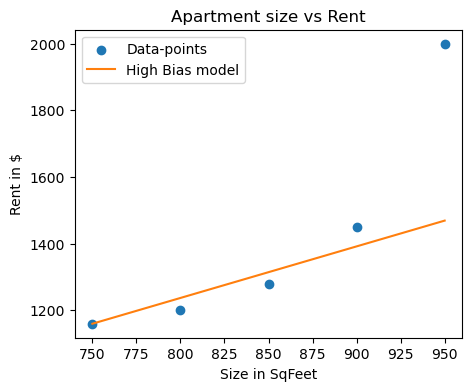

In [8]:
x_p = range(750, 951, 50)
y_p = [m * x + c for x in x_p]

plot_model(x_p, y_p, "High Bias model")

<a id="additive-modeling"></a>
# [3] Additive Modeling

$$
\large
\hat{y} = f_0(x) + \sum_{m = 1}^{M} \Delta_m(x)
$$

#### Learning rate: Alpha

Consider a very small learning rate.

In [9]:
alpha = 0.1

Capture errors at each stage of the iteration.

In [10]:
errors = []


def compute_mse(y, y_p):
    """
    Function to compute Mean Squared Error (MSE).
    """
    mse = np.mean(np.absolute(y - y_p))
    errors.append(mse)

### Iteration: $m = 0$

#### $F_0 = f_0(x)$

Initialize model with constant value:

Model-0 Predictions: [1280 1280 1280 1280 1280]


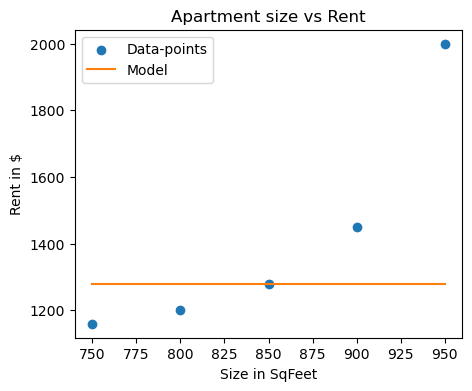

In [11]:
f0_x = np.median(y)
y_p = np.full_like(y, f0_x)
print("Model-0 Predictions:", y_p)

compute_mse(y, y_p)

plot_model(X, y_p)

### Iteration: $m = 1$

#### $F_1 = F_0 + \Delta_1(x)$

Noisy Predictions: [-185.6        -123.73333333    0.          262.93333333 1113.6       ]
Model Predictions: [1261.44       1267.62666667 1280.         1306.29333333 1391.36      ]


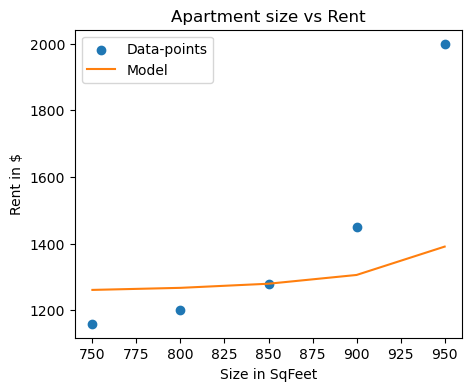

In [12]:
# noisy-predictions = train(pseudo-residuals).
f1_x = h(y - f0_x)
print("Noisy Predictions:", f1_x)

# additive modeling.
y_p = y_p + (alpha * f1_x)  # y-predicted
print("Model Predictions:", y_p)

compute_mse(y, y_p)
plot_model(X, y_p)

### Iteration: $m = 2$

#### $F_2 = F_1 + \Delta_2(x)$

Noisy Predictions: [2081.19466667 2047.37422222 1979.73333333 1835.99644444 1370.96533333]
Model Predictions: [1469.55946667 1472.36408889 1477.97333333 1489.89297778 1528.45653333]


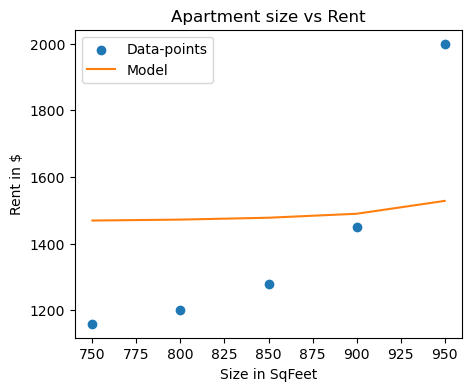

In [13]:
# noisy-predictions = train(pseudo-residuals).
f2_x = h(y - f1_x)
print("Noisy Predictions:", f2_x)

# additive modeling.
y_p = y_p + (alpha * f2_x)  # y-predicted
print("Model Predictions:", y_p)

compute_mse(y, y_p)
plot_model(X, y_p)

### Iteration: $m = 3$

#### $F_3 = F_2 + \Delta_3(x)$

Noisy Predictions: [-1424.78108444 -1310.6054637  -1082.25422222  -597.00783407   972.90695111]
Model Predictions: [1327.08135822 1341.30354252 1369.74791111 1430.19219437 1625.74722844]


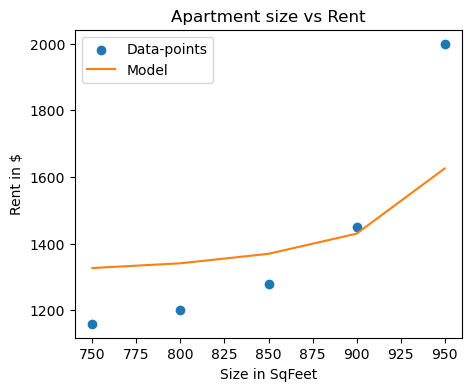

In [14]:
# noisy-predictions = train(pseudo-residuals)
f3_x = h(y - f2_x)
print("Noisy Predictions:", f3_x)

# additive modeling.
y_p = y_p + (alpha * f3_x)  # y-predicted
print("Model Predictions:", y_p)

compute_mse(y, y_p)
plot_model(X, y_p)

### Iteration: $m = 4$

#### $F_4 = F_3 + \Delta_4(x)$

Noisy Predictions: [3997.79474394 3883.06978386 3653.6198637  3166.03878337 1588.57058228]
Model Predictions: [1726.86083262 1729.6105209  1735.10989748 1746.79607271 1784.60428667]


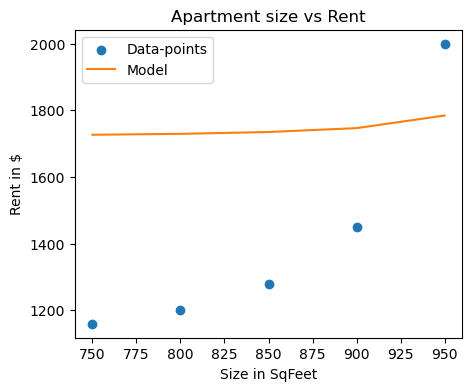

In [15]:
# noisy-predictions = train(pseudo-residuals)
f4_x = h(y - f3_x)
print("Noisy Predictions:", f4_x)

# additive modeling.
y_p = y_p + (alpha * f4_x)  # y-predicted
print("Model Predictions:", y_p)

compute_mse(y, y_p)
plot_model(X, y_p)

### Iteration: $m = 5$

#### $F_5 = F_4 + \Delta_5(x)$

Noisy Predictions: [3997.79474394 3883.06978386 3653.6198637  3166.03878337 1588.57058228]
Model Predictions: [1287.94857889 1314.629061   1367.99002523 1481.38207421 1848.23870328]


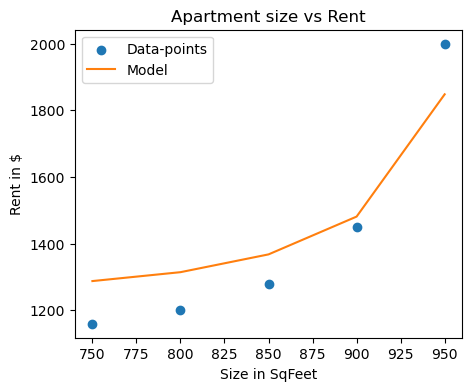

In [16]:
# noisy-predictions = train(pseudo-residuals)
f5_x = h(y - f4_x)
print("Noisy Predictions:", f4_x)

# additive modeling.
y_p = y_p + (alpha * f5_x)  # y-predicted
print("Model Predictions:", y_p)

compute_mse(y, y_p)
plot_model(X, y_p)

<a id="performance-metric"></a>
# [4] Measuring model performance



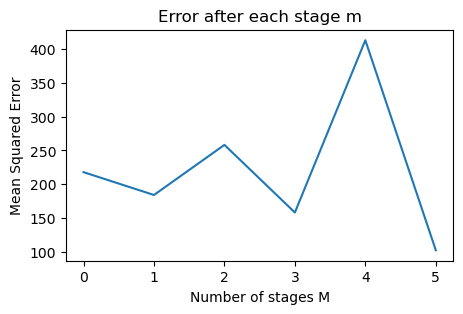

In [17]:
plt.figure(figsize=(5, 3))

x_m = range(0, 6)
y_e = errors
plt.plot(x_m, y_e)

plt.title("Error after each stage m")
plt.xlabel("Number of stages M")
plt.ylabel("Mean Squared Error")

plt.show()